## Herramientas

En este taller usamos pandas, sklearn y OpenCV, las siguientes celdas muestran algunos metodos que usaremos

[Pandas](https://pandas.pydata.org/)
Es una librería muy útil para trabajar con datos tabulares.
Es muy común encontrarla en el análisis de datos y en procesos de Machine Learning.
En este taller la usaremos para cargar un archivo CSV y explorar los datos.

In [1]:
# https://pandas.pydata.org/ 
import pandas as pd

# cargar un archivo csv
data_frame = pd.read_csv('./data/hands_signs.csv')

In [2]:
data_frame.describe()

,letter,path
count,10000,10000
unique,24,10000
top,R,./data/sign-language-mnist/O/16909.jpg
freq,475,1


In [3]:
data_frame.sample(frac=0.001)

,letter,path
3702,I,./data/sign-language-mnist/I/18879.jpg
8599,I,./data/sign-language-mnist/I/3331.jpg
1868,N,./data/sign-language-mnist/N/9030.jpg
9991,R,./data/sign-language-mnist/R/15051.jpg
7425,M,./data/sign-language-mnist/M/20466.jpg
4877,L,./data/sign-language-mnist/L/24734.jpg
1492,E,./data/sign-language-mnist/E/23734.jpg
2918,R,./data/sign-language-mnist/R/23035.jpg
4394,B,./data/sign-language-mnist/B/9155.jpg
7789,C,./data/sign-language-mnist/C/20503.jpg


[sklearn](http://scikit-learn.org/stable/) es una de las librerías de Machine Learning más usadas.
En este notebook usaremos dos de sus funciones, `train_test_split` y `LabelEncoder` para procesar los
datos antes de entrenar redes neuronales en tensorflow.


In [4]:
from sklearn.model_selection import train_test_split

x = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
y = [1  ,  2 ,  3 ,  3 ,  4 ,  5 ,  7 ,  8 ]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
print("x_train:", x_train)
print("y_train:", y_train)
print("x_test:", x_test)
print("y_test:", y_test)


x_train: ['a', 'c', 'g', 'd', 'h', 'f']
y_train: [1, 3, 7, 3, 8, 5]
x_test: ['b', 'e']
y_test: [2, 4]


In [6]:
from sklearn.preprocessing import LabelEncoder
y = ['a', 'a', 'a', 'b', 'b', 'd', 'e', 'f', 'h', 'h']

y_label = LabelEncoder().fit_transform(y)
print(y)
print(y_label)

['a', 'a', 'a', 'b', 'b', 'd', 'e', 'f', 'h', 'h']
[0 0 0 1 1 2 3 4 5 5]


[OpenCV](https://opencv.org/) es una librería de visión computarizada, en este taller la usaremos para cargar imágenes y realizar cambios de formato de color por ejemplo de RGB a escala de grises.


In [7]:
import cv2

image = cv2.imread("./data/sign-language-mnist/R/5570.jpg")
print(image.shape)

(28, 28, 3)


In [8]:
image

array([[[149, 149, 149],
        [152, 152, 152],
        [157, 157, 157],
        ...,
        [154, 154, 154],
        [152, 152, 152],
        [151, 151, 151]],

       [[151, 151, 151],
        [155, 155, 155],
        [160, 160, 160],
        ...,
        [157, 157, 157],
        [155, 155, 155],
        [154, 154, 154]],

       [[154, 154, 154],
        [158, 158, 158],
        [163, 163, 163],
        ...,
        [160, 160, 160],
        [159, 159, 159],
        [158, 158, 158]],

       ...,

       [[188, 188, 188],
        [181, 181, 181],
        [205, 205, 205],
        ...,
        [210, 210, 210],
        [208, 208, 208],
        [206, 206, 206]],

       [[197, 197, 197],
        [191, 191, 191],
        [214, 214, 214],
        ...,
        [210, 210, 210],
        [208, 208, 208],
        [206, 206, 206]],

       [[192, 192, 192],
        [200, 200, 200],
        [207, 207, 207],
        ...,
        [210, 210, 210],
        [208, 208, 208],
        [206, 206, 206]]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

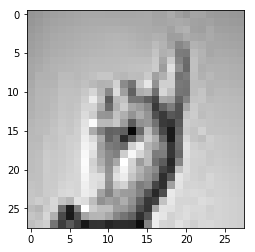

In [10]:
plt.imshow(image)

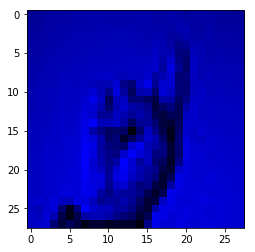

In [11]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

In [12]:
image_hsv

array([[[  0,   0, 149],
        [  0,   0, 152],
        [  0,   0, 157],
        ...,
        [  0,   0, 154],
        [  0,   0, 152],
        [  0,   0, 151]],

       [[  0,   0, 151],
        [  0,   0, 155],
        [  0,   0, 160],
        ...,
        [  0,   0, 157],
        [  0,   0, 155],
        [  0,   0, 154]],

       [[  0,   0, 154],
        [  0,   0, 158],
        [  0,   0, 163],
        ...,
        [  0,   0, 160],
        [  0,   0, 159],
        [  0,   0, 158]],

       ...,

       [[  0,   0, 188],
        [  0,   0, 181],
        [  0,   0, 205],
        ...,
        [  0,   0, 210],
        [  0,   0, 208],
        [  0,   0, 206]],

       [[  0,   0, 197],
        [  0,   0, 191],
        [  0,   0, 214],
        ...,
        [  0,   0, 210],
        [  0,   0, 208],
        [  0,   0, 206]],

       [[  0,   0, 192],
        [  0,   0, 200],
        [  0,   0, 207],
        ...,
        [  0,   0, 210],
        [  0,   0, 208],
        [  0,   0, 206]]

## Tensorflow

[Tensorflow](https://www.tensorflow.org/) es una librería de machine learning que hace uso de estructuras de grafos para realizar sus cálculos y computar los resultados de sus operaciones. En las próximas celdas de ese notebook se muestra de forma general como se realizan operaciones con esta librería de aprendizaje.

In [13]:
# Importar NumPy y TensorFlow
import numpy as np
import tensorflow as tf

<table>
<tr>
<td><p>La imagen a continuación representan los nodos que genera tensorflow después de declarar, inicializar variables y accionar las operaciones de la siguiente celda.<p>
<p> \* En Tensorflow primero se declaran las variables, constantes, operaciones etc., o se llama un método que hace este trabajo y retorna una operación o variable que contiene el resultado.</p>
<p> \* Después de tener las operaciones definidas se crea una sesión, se inicializan las variables y se realiza el computo de las operaciones con el método `sess.run(op)` de la sesión.</p>
</td>
<td><img src="images/graph1.png" height="420px"></td>
</tr>
</table>
<table>
<tr>
    <td>
    <img src="images/graphnetwork.png" width="620px"></td>
    <td>
</tr>
</table>

In [14]:
tf.reset_default_graph()

a_1 = tf.Variable(np.array([1,2,3], dtype=np.float32), name="variable_a1")
a_2 = tf.get_variable("variable_a2", initializer=3.32)

b = tf.constant([[0,1], [2, 3]], name="Matrix_B")
c = tf.zeros([2, 3], tf.int32) * 1
d = tf.ones_like(c)
e = tf.lin_space(10.0, 13.0, 4, name="linea")
op = tf.add(b, 25)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("variable a1, arreglo numpy\n", sess.run(a_1))
    print("variable a2, varible numérica\n", sess.run(a_2))
    print("constante matrix numpy\n", sess.run(b))
    print("genera matriz de ceros de dimensión 2x3\n", sess.run(c))
    print("genera matriz de unos con la dimensión de c\n", sess.run(d))
    print("genera secuencia de números\n", sess.run(e))
    print("corre operación op = b + 25\n", sess.run(op))

variable a1, arreglo numpy
 [1. 2. 3.]
variable a2, varible numérica
 3.32
constante matrix numpy
 [[0 1]
 [2 3]]
genera matriz de ceros de dimensión 2x3
 [[0 0 0]
 [0 0 0]]
genera matriz de unos con la dimensión de c
 [[1 1 1]
 [1 1 1]]
genera secuencia de números
 [10. 11. 12. 13.]
corre operación op = b + 25
 [[25 26]
 [27 28]]


In [15]:
# reiniciar el grafo de computo
tf.reset_default_graph()
# crear una variable result = 0
result = 0
# declarar dos constantes de tensorflow con valores positivos
# crear una operacion de suma entre las dos constantes
constante1  = tf.constant(7)
constante2  = tf.constant(2)
# en una session de tensor flow ejecutar la operacion de suma y 
# guardar el resultado en la variable result
with tf.Session() as sess:
   result = sess.run(tf.add(constante1, constante2))
# Imprimir la variable result

print(result)
assert (result > 0), "El resultado debe ser mayor a cero"

9


#### Redes en TensorFlow

El las próximas celdas veremos cómo implementar la red que se muestra en la siguiente imagen usando tensorflow.


<img src="images/ANN-Diagram.png" width="500px">
fuente: [viasat.com](https://techblog.viasat.com/using-artificial-neural-networks-to-analyze-trends-of-a-global-aircraft-fleet/)

Layer 1
$$ X(input) = \begin{bmatrix}
    . \\
    . \\
    . \\
    . 
\end{bmatrix}_{(4rows, 1columns)} \;\;\; W1 = \begin{bmatrix}
    . . . . .\\
    . . . . .\\
    . . . . .\\
    . . . . .
\end{bmatrix}_{(4rows, 5columns)}\;\;\;  b1 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Z1 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  A1 = ReLu(Z1) = \begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\tag{layer 1}$$

$$ Z1 = W1^T X + b1 \; \; \; $$
$$ A1 = ReLu(Z1) $$

Layer 2
$$ A1(input) = \begin{bmatrix}
    . \\
    . \\
    . \\
    . \\
    . 
\end{bmatrix} \;\;\; W2 = \begin{bmatrix}
    . . . . . . .\\
    . . . . . . .\\
    . . . . . . .\\
    . . . . . . .\\
    . . . . . . .
\end{bmatrix}_{(5rows, 7columns)}\;\;\;  b2 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Z2 =\begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  A2 = ReLu(Z1) = \begin{bmatrix}
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .  \\
    .
\end{bmatrix}\tag{layer 2}$$

$$ Z2 = W2^T A1 + b2 \; \; \; $$
$$ A2 = ReLu(Z2) $$

Layer Output
$$ A2(input) = \begin{bmatrix}
    . \\
    . \\
    . \\
    . \\
    . \\
    . \\
    . 
\end{bmatrix} \;\;\; \;\;\;\;\;\;\;W3 = \begin{bmatrix}
    . . .\\
    . . .\\
    . . .\\
    . . .\\
    . . .\\
    . . .\\
    . . .
\end{bmatrix}_{(7rows, 3columns)}\;\;\;\;\;\;\;\;  b3 =\begin{bmatrix}
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Z3 =\begin{bmatrix}
    .  \\
    .  \\
    .
\end{bmatrix}\;\;\;  Output = SoftMax(Z3) = \begin{bmatrix}
    .  \\
    .  \\
    .
\end{bmatrix}\tag{layer Output}$$

$$ Z3 = W3^T A2 + b3 \; \; \; $$
$$ \hat{y} = Output = Softmax(Z3) $$

Red en una sola linea
$$\hat{y} = softmax(\;\; w_3^T \; ReLu(w_2^T \; ReLu(w_1^T x\;+\;b1)\;\; +\; b_2\;\;)\; + \;b_3\;\; )$$


## la variable *W*

En las redes neuronales, la variable *W* es parte de los parámetros principales de la red, también se la conoce como pesos de la red. Estos parámetros controlan qué conexiones de red se activan y desactivan determinando la salida producida por la red.

Cuando la red está siendo entrenada, los valores de estos parámetros cambian en cada iteración para que la red se ajuste y produzca los resultados deseados.

En la siguiente lista se muestra cómo una variable llamada W se inicializa como una matriz de 5x7 con valores aleatorios

In [16]:
# Inicializar matrix W con valores aleatoreos con distribucion normal
tf.set_random_seed(100)
tf.reset_default_graph()

W = tf.get_variable("normal_dist_matrix", shape=(5, 7), initializer = tf.random_normal_initializer() )
_W = None
with tf.Session() as sess:
    sess.run(W.initializer)
    _W = sess.run(W)

print(_W)
print(type(_W))

[[ 1.1946737  -0.5161599   0.0557017   2.4921842   1.1601485  -2.4060593
   0.43288094]
 [ 0.93003654 -1.1615359  -0.3800813   0.64383334 -0.14434968 -0.7263298
   0.03155627]
 [-2.6306512  -0.26057285  0.83353716  0.9766017  -0.4341623  -0.6046187
   2.0210433 ]
 [ 0.55125046  0.67538553  0.38748765 -2.4365106  -1.4060351  -0.4731748
  -0.13607308]
 [ 0.649954   -1.6407468   1.3397207   0.16274756 -0.59720385  0.0511632
   0.449905  ]]
<class 'numpy.ndarray'>


## La variable b

Esta variable (b) junto con la variable (W) son la parámetros que una red aprenden en el proceso de entrenamiento. Este parámetro contiene números o arreglo de números que van a sumarse después de realizar una operación entre la entrada de la red (x) y el parámetro (W)

In [17]:
# usando asignaciones con operacion
tf.reset_default_graph()
b = tf.get_variable('b', initializer = tf.constant(10))

with tf.Session() as sess:
    sess.run(b.initializer)
    sess.run(b.assign_add(30))
    print("b = 10 + 30 = 40:", b.eval())
    sess.run(b.assign_add(30))
    print("b = 70:", b.eval())

with tf.Session() as sess:
    sess.run(b.initializer)
    print("After recovery session by definition b = 10: ", b.eval())

b = 10 + 30 = 40: 40
b = 70: 70
After recovery session by definition b = 10:  10


###### Intentaremos hacer una red en tensorflow que se mostro en la imagen anterior:

$$\hat{y} = softmax(\;\; w_3^T \; ReLu(w_2^T \; ReLu(w_1^T x\;+\;b1)\;\; +\; b_2\;\;)\; + \;b_3\;\; )$$

<img src="images/ANN-Diagram.png" width="300px">

In [18]:
tf.reset_default_graph()
tf.set_random_seed(100)

#input layer
X = tf.get_variable('X', shape=( 4), initializer =  tf.truncated_normal_initializer())

# parameters layer 1
W_1 = tf.get_variable('W_1', shape=(4, 5), initializer = tf.ones_initializer() )
b_1 = tf.get_variable('B_1', initializer =  np.ones(5, dtype=np.float32)  )

# hidden layer1 before activation
Z_1 = tf.add(tf.tensordot(tf.transpose(W_1), X, 1), b_1)

# parameters layer 2
b_2 = tf.get_variable("B_2", initializer = np.ones(7, dtype=np.float32))
W_2 = tf.get_variable("W_2", shape=(5,7), initializer = tf.truncated_normal_initializer())

# parmeters ouput layer
b_3 = tf.get_variable("B_3", initializer = np.ones(3, dtype=np.float32))
W_3 = tf.get_variable("W_3", shape=(7,3), initializer = tf.truncated_normal_initializer())

with tf.Session() as sess:
    sess.run(tf.variables_initializer([b_1, W_1, X]))
    _z1 = shape = sess.run(Z_1)
    print("\n\nb1 array, shape:", b_1.get_shape() , "\n", b_1.eval())
    print("\n\nW1 matrix, shape:", W_1.get_shape(), "\n", W_1.eval())
    print("\n\nX matrix, shape:", X.get_shape(), "\n", X.eval())
    print("\n\nZ1 = (W * X + b) matrix, shape:", _z1.shape, "\n", _z1)




b1 array, shape: (5,) 
 [1. 1. 1. 1. 1.]


W1 matrix, shape: (4, 5) 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


X matrix, shape: (4,) 
 [ 0.01935653 -0.5288064   0.645795   -1.3095728 ]


Z1 = (W * X + b) matrix, shape: (5,) 
 [-0.17322755 -0.17322755 -0.17322755 -0.17322755 -0.17322755]


### ReLu = Max(0, x)

<img src="images/activation.png" width="150px">

In [19]:
# tf.reset_default_graph()
# No reiniciamos el grafo para recuperar las computacions anteriores
# usamos la funcion ReLu sobre Z_1

A_1 = tf.nn.relu(Z_1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(A_1)
    print("\n\nA_1 = apply relu(Z) matrix, shape:", A_1.get_shape(), "\n", A_1.eval())




A_1 = apply relu(Z) matrix, shape: <unknown> 
 [0. 0. 0. 0. 0.]


In [20]:
Z_2 = tf.add(tf.tensordot(tf.transpose(W_2), A_1, 1), b_2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(Z_2)
    print("Printing Z2:", Z_2.eval())

Printing Z2: [1. 1. 1. 1. 1. 1. 1.]


In [21]:
A_2 = tf.nn.relu(Z_2)
Z_3 = tf.add(tf.tensordot(tf.transpose(W_3), A_2,1), b_3)

In [22]:
Z_3_softmax = tf.nn.softmax(Z_3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Z3 values:", Z_3.eval())
    _z3_softmax= sess.run(Z_3_softmax)
    print("Softmax(Z3):", _z3_softmax)
    print("dist:", list(zip([round(x*100,3) for x in _z3_softmax], _z3_softmax)))
    it_should_sum_one  = np.sum(_z3_softmax)
    print("1 = ", it_should_sum_one)


Z3 values: [3.2960267  0.456038   0.37811255]
Softmax(Z3): [0.8988985  0.05251933 0.04858214]
dist: [(89.89, 0.8988985), (5.252, 0.052519333), (4.858, 0.04858214)]
1 =  0.99999994


### Tic Tac Toe

Ahora tratemos de hacer un red que reciba un juego de Triqui como input, y 
su output va a ser quien es el ganador del triqui, que puede ser O, X o 
ninguno gana. vamos a representar la salida con un vector de tres posiciones
por ejemplo este vector de salida `[0.7, 0.2, 0.1]` indica que gano el jugador
con la `O` por que tiene la probabilidad mas alta en la posición 1. la posición 2
le corresponde a la `X` y la posición 3 a ninguna opción.


##### Representando la entrada (input) y la salida (output) de la red
La entrada (input) de la red es el tablero de triqui, para representarlo usaremos un 
vector de 9 posiciones de la siguiente manera:

<table>
<tr>
    <td width="60%">Este juego de triqui donde gana el jugador con la X se representara de la siguiente manera
    <b>`[1, 1, 1,-1, 0, 0,-1, 0, 1]`</b> como se puede ver la `X` son el numero 1, la O son el numero
    0 y los espacios sin jugar  son -1.
    </td>
    <td><img src="images/triqui1.png" width="100px"></td>
</tr>
<tr>
    <td><p>Este juego de triqui no gana ningún jugador y se representa con el siguiente vector</p>
    <p><b>`[0, 1, 0, 0, 0, 1, 1, 0, 1]`</b></p></td>
    <td><img src="images/triqui2.png" width="100px"></td>
</tr>

<tr>
<td><p>Este juego de triqui gana el jugador con la letra O y se representa con el siguiente vector</p>
    <p><b>`[0, 1, 1, 0, 0,-1, 0, 1, 1]`</b></p></td>
<td><img src="images/triqui3.png" width="100px"></td>
</tr>

<tr>
<td>
<p>Este juego de triqui gana el jugador con la letra X y se representa con el siguiente vector</p>
    <p><b>`[1, 0, 0, 0, 1,-1, 1,-1, 1]`</b></p>
</td>
<td><img src="images/triqui4.png" width="100px"></td>
</tr>

<tr>
<td><p>Este juego de triqui gana el jugador con la letra O y se representa con el siguiente vector</p>
    <p><b>`[0,-1,-1, 1, 0, 1,-1, 1, 0]`</b></p></td>
<td><img src="images/triqui5.png" width="100px"></td>
</tr>
</table>

##### Lo que queremos de la red

Para nosotros es fácil ver quien gano un juego de triqui, pero para un programa no es evidente,

Como escribir un programa que nos diga quien gano dado el tablero del juego ?

Seguramente hay una solución muy sencilla con la programación convencional usando `For` `Loops` `if` etc,
Talvez usar redes es como matar una hormiga con un cañón, pero puede ser entretenido para implementar una red en tensorflow













In [23]:
## https://playtictactoe.org/
## ejemplos de entrenamiento Tic Tac Toe(Triqui)
x1 = np.array([1, 1, 0, 0, 1, 1, 1, 0, 0]) ; y1 = 2
x2 = np.array([1, 0, 0,-1, 0, 1, 1, 0, 1]) ; y2 = 2
x3 = np.array([1,-1, 0, 1, 0,-1, 1, 0, 1]) ; y3 = 1
x4 = np.array([1,-1, 1, 0, 0, 0, 1,-1, 0]) ; y4 = 0
x5 = np.array([1, 1, 1,-1, 0, 0,-1, 0, 1]) ; y5 = 1
x6 = np.array([0,-1,-1, 1, 0, 1,-1, 1, 0]) ; y6 = 0
## ejemplos de prueba Tic Tac Toe(Triqui)
x7 = np.array([1, 0, 0, 0, 1,-1, 1,-1, 1]) ; y7 = 1
x8 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 1]) ; y8 = 2
x9 = np.array([0, 1, 1, 0, 0,-1, 0, 1, 1]) ; y9 = 0

X_train = [x1, x2, x3, x4, x5, x6, x7]
y_train = [y1, y2, y3, y4, y5, y6, y7]

X_test  = [x7, x8, x9]
y_test  = [y7, y8, y9]

<img src="images/ANN-Diagram.png" width="300px">

In [24]:
tf.reset_default_graph()
tf.set_random_seed(1)

x = tf.placeholder(tf.float32, (9), name="X") 
y = tf.placeholder(tf.int32, (None), name="Y")
y_one_hot = tf.one_hot(y, 3)

num_neurons_layer_1 = 80
num_neurons_layer_2 = 100
# parameters layer 1
b1  = tf.get_variable("b1", initializer = np.zeros(num_neurons_layer_1, dtype=np.float32))
W1 = tf.get_variable("W1", (num_neurons_layer_1, 9), initializer = tf.truncated_normal_initializer())
Z1 = tf.add(tf.tensordot(W1, x, 1), b1)
A1 = tf.nn.relu(Z1)

# parameters layer 2
b2  = tf.get_variable("b2", initializer = np.zeros(num_neurons_layer_2, dtype=np.float32))
W2 = tf.get_variable("W2", (num_neurons_layer_2, num_neurons_layer_1), initializer = tf.truncated_normal_initializer())
Z2 = tf.add(tf.tensordot(W2, A1, 1), b2)
A2 = tf.nn.relu(Z2)

# parmameters output layer
W_l = tf.get_variable("W_l", (3, num_neurons_layer_2), initializer=tf.truncated_normal_initializer())
b_l = tf.get_variable("b_l", initializer=np.zeros(3, dtype=np.float32))


logits = tf.add(tf.tensordot(W_l, A2, 1), b_l)


##### Aprendiendo los parametros W y b

Hasta el momento hemos visto como se calcula la red hacia adelante, pero no hemos visto como la red recibe retroalimentación para saber como actualiza los parámetros W y b, de forma que la salida de la red nos de el resultado esperado. Esto se logra con un proceso llamado propagación hacia atrás, y en ese proceso los parámetros W y b se actualizan.

<img src="images/backpropagation-in-convolutional-neural-network-8-638.jpg" width="600px">

fuente: https://www.slideshare.net/kuwajima/cnnbp

In [25]:
# Learning

entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
loss = tf.reduce_mean(entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(loss)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [26]:
#trainning
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(400): #Epocas
        train_predictions = []
        for i in range(len(X_train)):
            sess.run(train, feed_dict={x: X_train[i], y: y_train[i]})
        # si el actual epoch es multiplo de 20 ejemplo, 20, 40, 60 etc
        # vamos a medir la precision sobre el conjunto de entrenamiento
        if (epoch % 20) == 0:
            for j in range(len(X_train)):
                result = sess.run(tf.nn.softmax(logits), feed_dict={ x: X_train[j], y: y_train[j] })
                # verifica si la prediccion corresponde que el verdaro output del input
                predict_correct = np.argmax(result) == y_train[j]
                train_predictions.append(predict_correct)
                accuracy = sum(train_predictions)/float(len(train_predictions))
            print("Porcentaje de precisión:",   round(accuracy*100, 3) )
            
            
print("\n")


Porcentaje de precisión: 57.143
Porcentaje de precisión: 71.429
Porcentaje de precisión: 71.429
Porcentaje de precisión: 71.429
Porcentaje de precisión: 71.429
Porcentaje de precisión: 71.429
Porcentaje de precisión: 71.429
Porcentaje de precisión: 85.714
Porcentaje de precisión: 85.714
Porcentaje de precisión: 85.714
Porcentaje de precisión: 85.714
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0
Porcentaje de precisión: 100.0




### Predictions

En las próximas celdas vamos a usar el modelo que fue entrenado para predecir quien gano el triqui con 3 ejemplos no vistos por la red.

<table>
<tr>
    <td width="60%"><p>Este juego de triqui donde gana el jugador con la X</p>
    
    <b>`[1, 0, 0, 0, 1,-1, 1,-1, 1]`</b>
    </td>
    <td><img src="images/triqui7.png" width="100px"></td>
</tr>
</table>


In [27]:
#prediction
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # x7 es el triqui donde gana X
    # X es representado por el numero 1 o posicion 1 en un arreglo the 3 posiciones
    result = sess.run(tf.nn.softmax(logits), feed_dict={ x: x7, y: y7})
    print("En este juego gana X:", result)
    print("Este resultado gana X ?", np.argmax(result) == 1,)
    print("\n")



En este juego gana X: [0.000000e+00 1.000000e+00 7.645017e-22]
Este resultado gana X ? True




<table>
<tr>
    <td width="60%"><p>Este juego de triqui no gana ningun jugador</p>
    <b>`[0, 1, 0, 0, 0, 1, 1, 0, 1]`</b>
    </td>
    <td><img src="images/triqui8.png" width="100px"></td>
</tr>
</table>

In [28]:
#prediction
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # x7 es el triqui donde gana X
    # X es representado por el numero 1 o posicion 1 en un arreglo the 3 posiciones
    result = sess.run(tf.nn.softmax(logits), feed_dict={ x: x8, y: y8})
    print("En este juego gana O:", result)
    print("Este resultado gana O ?", np.argmax(result) == 2,)
    print("\n")


En este juego gana O: [0.0000000e+00 4.0707983e-30 1.0000000e+00]
Este resultado gana O ? True




<table>
<tr>
    <td width="60%"><p>Este juego de triqui gana el jugador con la O</p>
    <b>`[0, 1, 1, 0, 0,-1, 0, 1, 1]`</b>
    </td>
    <td><img src="images/triqui9.png" width="100px"></td>
</tr>
</table>

In [29]:
#prediction
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # x7 es el triqui donde gana X
    # X es representado por el numero 1 o posicion 1 en un arreglo the 3 posiciones
    result = sess.run(tf.nn.softmax(logits), feed_dict={ x: x9, y: y9})
    print("En este juego gana O:", result)
    print("Este resultado gana O ?", np.argmax(result) == 0,)
    print("\n")

En este juego gana O: [9.9996340e-01 8.0236008e-23 3.6564492e-05]
Este resultado gana O ? True


